In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#transactions = pd.read_csv('/content/gdrive/MyDrive/stores_kaggale_data/transactions.csv')
#holidays = pd.read_csv('/content/gdrive/MyDrive/stores_kaggale_data/holidays_events.csv')
oil = pd.read_csv('/content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/oil.csv')
#test = pd.read_csv('/content/gdrive/MyDrive/stores_kaggale_data/test.csv')
#stores = pd.read_csv('/content/gdrive/MyDrive/stores_kaggale_data/stores.csv')
#train = pd.read_csv('/content/gdrive/MyDrive/stores_kaggale_data/train.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip '/content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip'

Archive:  /content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1699,2017-08-27
1700,2017-08-28
1701,2017-08-29
1702,2017-08-30


,date,dcoilwtico
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
5,2013-01-06,93.173333
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


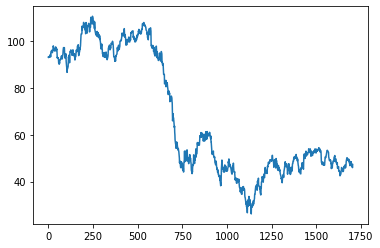

In [38]:
oil = pd.read_csv('oil.csv')
idx = pd.date_range('01/01/2013', '31/08/2017')

oil['date'] = pd.to_datetime(oil['date'])

new_oil = pd.DataFrame()
new_oil['date'] = idx 
display(new_oil)

new_oil = pd.merge(new_oil, oil, on = 'date' , how = 'left')
oil = new_oil

oil['dcoilwtico'].interpolate(inplace=True)
oil = oil.fillna(93)

oil = oil.iloc[1: , :]

display(oil)

oil['dcoilwtico'].plot()

# oil.index = pd.DatetimeIndex(oil.index)
# oil = oil.reindex(idx, fill_value= (oil['dcoilwtico']))

In [ ]:

display(oil)

,date,dcoilwtico
0,2013-01-01,93.000000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


In [5]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 1 to 1703
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1703 non-null   datetime64[ns]
 1   dcoilwtico  1703 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [6]:
oil['dcoilwtico'].sort_values(ascending=False).tail(45)

1125    32.300000
1128    32.290000
1116    32.070000
1152    32.013333
1104    32.013333
1148    31.840000
1151    31.650000
1129    31.630000
1126    31.620000
1117    31.483333
1105    31.420000
1150    31.400000
1147    31.370000
1108    31.220000
1118    30.896667
1130    30.860000
1146    30.776667
1143    30.770000
1142    30.680000
1131    30.476667
1107    30.420000
1106    30.420000
1149    30.350000
1119    30.310000
1145    30.183333
1132    30.093333
1127    29.900000
1133    29.710000
1144    29.590000
1115    29.550000
1120    29.540000
1109    29.450000
1137    29.320000
1138    29.252500
1110    29.205000
1139    29.185000
1140    29.117500
1141    29.050000
1111    28.960000
1112    28.715000
1113    28.470000
1134    27.960000
1135    27.540000
1114    26.680000
1136    26.190000
Name: dcoilwtico, dtype: float64

In [33]:
oil['missingData'] = oil['dcoilwtico'].apply(lambda x : 1 if np.isnan(x) else 0)
oil['missingData'].sort_values(ascending=True)


608    0
807    0
806    0
805    0
804    0
      ..
364    1
522    1
757    1
843    1
0      1
Name: missingData, Length: 1218, dtype: int64

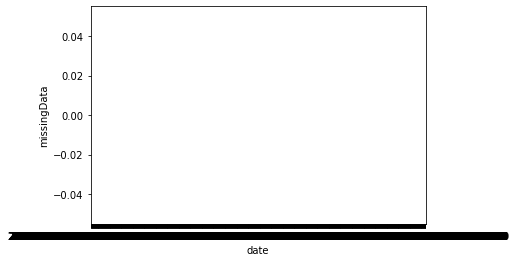

In [8]:
sns.barplot(x=oil['date'], y=oil['missingData'])
# data is not known if missing at random

Text(0, 0.5, 'Sample Number')

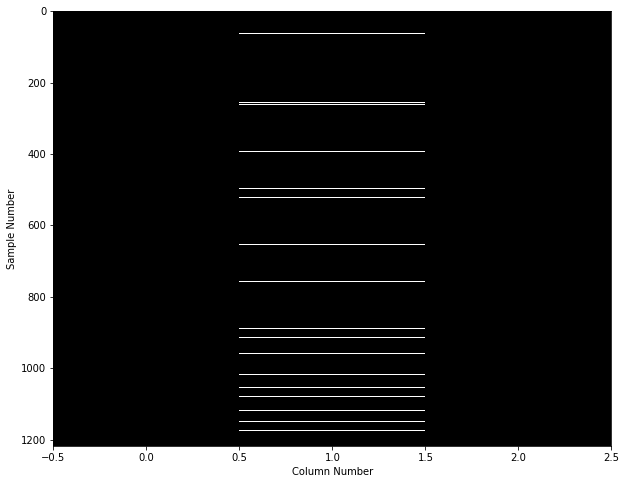

In [34]:
plt.figure(figsize = (10,8))
plt.imshow(oil.isna(), aspect = "auto", interpolation = "nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [10]:
# to check if the data missing at random we need:
oil['date'] = pd.DatetimeIndex(oil['date'])
oil['year'] = oil['date'].dt.year
oil['day'] = oil['date'].dt.day
oil['month'] = oil['date'].dt.month
oil['week'] = oil['date'].dt.week

oil.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,date,dcoilwtico,missingData,year,day,month,week
1,2013-01-02,93.140000,0,2013,2,1,1
2,2013-01-03,92.970000,0,2013,3,1,1
3,2013-01-04,93.120000,0,2013,4,1,1
4,2013-01-05,93.146667,0,2013,5,1,1
5,2013-01-06,93.173333,0,2013,6,1,1


In [11]:
# check for correlation with missing data to other features
oil.corr().iloc[1, :] 
#there is no significant correlation with other features --> data missing completly at random

dcoilwtico    NaN
missingData   NaN
year          NaN
day           NaN
month         NaN
week          NaN
Name: missingData, dtype: float64

In [12]:
# oil['dcoilwtico'].interpolate( method="linear", limit=1, inplace=True)
# print(oil['dcoilwtico'].isna().sum())
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(inplace=True)
display(oil)


,date,dcoilwtico,missingData,year,day,month,week
1,2013-01-02,None,0,2013,2,1,1
2,2013-01-03,None,0,2013,3,1,1
3,2013-01-04,None,0,2013,4,1,1
4,2013-01-05,None,0,2013,5,1,1
5,2013-01-06,None,0,2013,6,1,1
...,...,...,...,...,...,...,...
1699,2017-08-27,None,0,2017,27,8,34
1700,2017-08-28,None,0,2017,28,8,35
1701,2017-08-29,None,0,2017,29,8,35
1702,2017-08-30,None,0,2017,30,8,35


In [36]:
oil[oil['missingData'] == 1].count()


date           43
dcoilwtico      0
missingData    43
dtype: int64

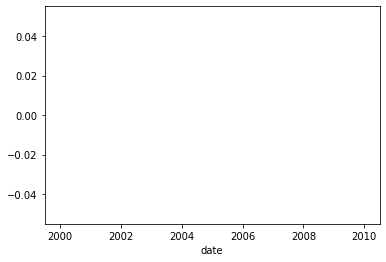

In [14]:
sns.lineplot(x=oil['date'], y=oil['dcoilwtico'])

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [20]:
check_stationarity(oil['dcoilwtico'])

TypeError: ignored

In [ ]:
plot_acf(x=oil['dcoilwtico'], lags=100)

In [ ]:
plot_pacf(oil['date'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

oil.set_index('date', inplace=True)

analysis = oil[['dcoilwtico']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
residual.plot()
oil['dcoilwtico'].corr(residual['dcoilwtico'])
decompose_result_mult.plot()

In [ ]:
oil['dcoilwtico'][-3:]

In [ ]:
arr = [1,2,3,4,5,6,7,8,9,10]

for i in range(2, len(arr)):
  print("i is : " ,i)
  for j in range(2,11):
    if(len(arr[i - j : i]) > 2 ):

      print(j)
      print(arr[i - j : i - 1])

In [21]:
len(dict1[10])
#len(oil['dcoilwtico'])

NameError: ignored

In [24]:
# arr1 = []
# arr2 = []
# arr3 = []
# arr4 = []
# arr5 = []
# arr6 = []
# arr7 = []
# arr8 = []
# arr9 = []
# arr10 = []

dict1 = {1 : [] , 2 : [] , 3 : [0,0,0] , 4 : [0,0,0,0] , 5 : [0,0,0,0,0], 6 : [0,0,0,0,0,0] , 7 : [0,0,0,0,0,0,0] , 8 : [0,0,0,0,0,0,0,0] , 9 : [0,0,0,0,0,0,0,0,0] , 10 : [0,0,0,0,0,0,0,0,0,0]}

for i in range(2,len(oil['dcoilwtico'])):
  print("this is i ", i)
  for j in range(2,11):
    print("this is j ", j)
    if(len(oil['dcoilwtico'][i - j : i]) > 2):
      print((oil['dcoilwtico'][i - j : i]))
      #print(np.gradient(oil['dcoilwtico'][i - j : i - 1],2).mean())
      dict1[j].append((np.gradient(oil['dcoilwtico'][i - j : i],2).mean()))

    
#dict1[3]
    #oil['gradient_{}'.format(i+1)] = np.gradient(oil['dcoilwtico'],2)

#oil.head(5)

Streaming output truncated to the last 5000 lines.
1626    44.470000
1627    44.730000
1628    44.566667
1629    44.403333
1630    44.240000
1631    43.340000
Name: dcoilwtico, dtype: float64
this is j  9
1623    46.100000
1624    46.410000
1625    44.790000
1626    44.470000
1627    44.730000
1628    44.566667
1629    44.403333
1630    44.240000
1631    43.340000
Name: dcoilwtico, dtype: float64
this is j  10
1622    46.006667
1623    46.100000
1624    46.410000
1625    44.790000
1626    44.470000
1627    44.730000
1628    44.566667
1629    44.403333
1630    44.240000
1631    43.340000
Name: dcoilwtico, dtype: float64
this is i  1632
this is j  2
this is j  3
1630    44.24
1631    43.34
1632    42.48
Name: dcoilwtico, dtype: float64
this is j  4
1629    44.403333
1630    44.240000
1631    43.340000
1632    42.480000
Name: dcoilwtico, dtype: float64
this is j  5
1628    44.566667
1629    44.403333
1630    44.240000
1631    43.340000
1632    42.480000
Name: dcoilwtico, dtype: float64
th

In [26]:
oil['gradient_3'] = dict1[3]
oil['gradient_4'] = dict1[4]
oil['gradient_5'] = dict1[5]
oil['gradient_6'] = dict1[6]
oil['gradient_7'] = dict1[7]
oil['gradient_8'] = dict1[8]
oil['gradient_9'] = dict1[9]
oil['gradient_10'] = dict1[10]


In [27]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 1 to 1703
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1703 non-null   datetime64[ns]
 1   dcoilwtico   1703 non-null   float64       
 2   gradient_3   1703 non-null   float64       
 3   gradient_4   1703 non-null   float64       
 4   gradient_5   1703 non-null   float64       
 5   gradient_6   1703 non-null   float64       
 6   gradient_7   1703 non-null   float64       
 7   gradient_8   1703 non-null   float64       
 8   gradient_9   1703 non-null   float64       
 9   gradient_10  1703 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 146.4 KB


In [28]:
#oil = oil.drop('missingData', axis=1)
oil.head(20)

,date,dcoilwtico,gradient_3,gradient_4,gradient_5,gradient_6,gradient_7,gradient_8,gradient_9,gradient_10
1,2013-01-02,93.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2013-01-03,92.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2013-01-04,93.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2013-01-05,93.146667,-0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2013-01-06,93.173333,0.044167,-0.008125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2013-01-07,93.200000,0.013333,0.036458,-0.003833,0.000000,0.000000,0.000000,0.000000,0.000000
7,2013-01-08,93.210000,0.013333,0.013333,0.031833,-0.000972,0.000000,0.000000,0.000000,0.000000
8,2013-01-09,93.080000,0.009167,0.010208,0.010833,0.026667,-0.000714,0.000000,0.000000,0.000000
9,2013-01-10,93.810000,-0.030000,-0.018125,-0.011833,-0.007639,0.008571,-0.013125,0.000000,0.000000
10,2013-01-11,93.600000,0.150000,0.122500,0.101500,0.086806,0.076310,0.080000,0.052778,0.000000


In [31]:
oil.to_csv("oil_final.csv")